In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/datascience/dataset.zip -d /content/drive/MyDrive/datascience


  inflating: /content/drive/MyDrive/datascience/dataset/trainingData/Y/614.jpg  
  inflating: /content/drive/MyDrive/datascience/dataset/trainingData/Y/615.jpg  
  inflating: /content/drive/MyDrive/datascience/dataset/trainingData/Y/616.jpg  
  inflating: /content/drive/MyDrive/datascience/dataset/trainingData/Y/617.jpg  
  inflating: /content/drive/MyDrive/datascience/dataset/trainingData/Y/618.jpg  
  inflating: /content/drive/MyDrive/datascience/dataset/trainingData/Y/619.jpg  
  inflating: /content/drive/MyDrive/datascience/dataset/trainingData/Y/62.jpg  
  inflating: /content/drive/MyDrive/datascience/dataset/trainingData/Y/620.jpg  
  inflating: /content/drive/MyDrive/datascience/dataset/trainingData/Y/623.jpg  
  inflating: /content/drive/MyDrive/datascience/dataset/trainingData/Y/624.jpg  
  inflating: /content/drive/MyDrive/datascience/dataset/trainingData/Y/627.jpg  
  inflating: /content/drive/MyDrive/datascience/dataset/trainingData/Y/628.jpg  
  inflating: /content/drive/

In [3]:
!pip install keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os


###1. Data Preprocessing

#### Generating images for the Training set

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#### Generating images for the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)

### Creating the Training set

In [9]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/datascience/dataset/trainingData',                                
                                                 target_size = (128, 128),
                                                 batch_size = 10,
                                                 color_mode = 'grayscale',                                
                                                 class_mode = 'categorical')

Found 12845 images belonging to 27 classes.


In [10]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/datascience/dataset/testingData',
                                            target_size = (128, 128),                                  
                                            batch_size = 10,        
                                            color_mode = 'grayscale',
                                            class_mode = 'categorical')

Found 4268 images belonging to 27 classes.


### Part 2 - Building the CNN

#### Initializing the CNN

In [11]:
classifier = tf.keras.models.Sequential()

#### Step 1 - Convolution

In [12]:
classifier.add(tf.keras.layers.Conv2D(filters=32,
                                     kernel_size=3, 
                                     padding="same", 
                                     activation="relu", 
                                     input_shape=[128, 128, 1]))

#### Step 2 - Pooling

In [13]:
classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))

#### Adding a second convolutional layer

In [14]:
classifier.add(tf.keras.layers.Conv2D(filters=32, 
                                      kernel_size=3, 
                                      padding="same", 
                                      activation="relu"))

classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))

#### Step 3 - Flattening

In [15]:
classifier.add(tf.keras.layers.Flatten())

#### Step 4 - Fully Connection

In [16]:
classifier.add(tf.keras.layers.Dense(units=128, 
                                     activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.40))
classifier.add(tf.keras.layers.Dense(units=96, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.40))
classifier.add(tf.keras.layers.Dense(units=64, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=27, activation='softmax')) # softmax for more than 2

### Part 3 - Training the CNN

#### Compiling the CNN

In [17]:
classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

#### Training the CNN on the Training set and evaluating it on the Test set

In [18]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4

In [19]:
model = classifier.fit(training_set,
                  epochs = 5,
                  validation_data = test_set)

Epoch 1/5
1285/1285 [==============================] - 70s 48ms/step - loss: 2.2506 - accuracy: 0.3030 - val_loss: 0.3905 - val_accuracy: 0.8873
Epoch 2/5
1285/1285 [==============================] - 59s 46ms/step - loss: 0.7823 - accuracy: 0.7283 - val_loss: 0.1218 - val_accuracy: 0.9665
Epoch 3/5
1285/1285 [==============================] - 58s 45ms/step - loss: 0.5218 - accuracy: 0.8241 - val_loss: 0.0548 - val_accuracy: 0.9850
Epoch 4/5
1285/1285 [==============================] - 59s 46ms/step - loss: 0.4225 - accuracy: 0.8585 - val_loss: 0.0531 - val_accuracy: 0.9829
Epoch 5/5
1285/1285 [==============================] - 58s 45ms/step - loss: 0.3581 - accuracy: 0.8864 - val_loss: 0.0252 - val_accuracy: 0.9939


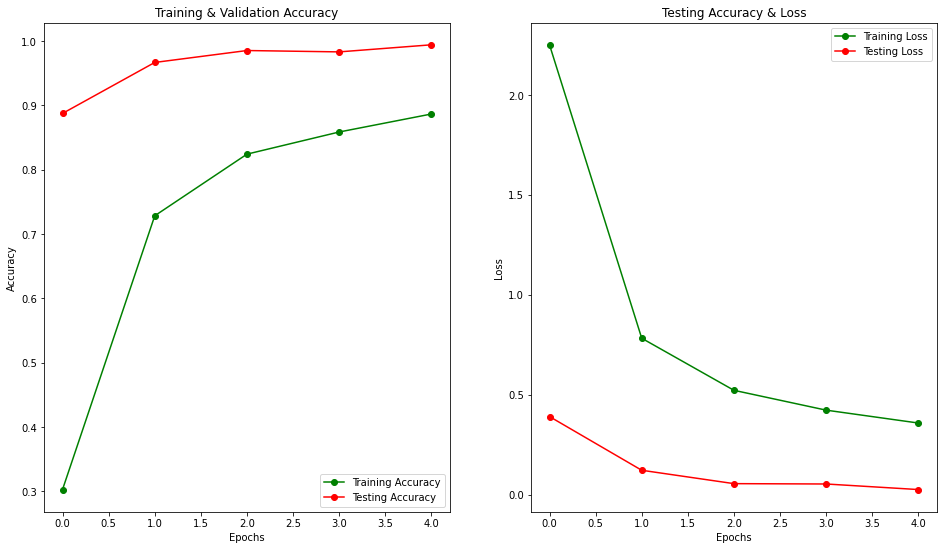

In [21]:
import matplotlib.pyplot as plt

epochs = [i for i in range(5)]
fig , ax = plt.subplots(1,2)
train_acc = model.history['accuracy']
train_loss = model.history['loss']
val_acc = model.history['val_accuracy']
val_loss = model.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

### Saving the Model

In [ ]:
classifier.save('/content/drive/MyDrive/ml/myModel.h5')